In [1]:
import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt

C:\Users\Avinash\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())

model.add(Dense(output_dim=32,activation='relu'))
model.add(Dense(output_dim=7,activation='softmax'))


model.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

C:\Users\Avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
C:\Users\Avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7)`
  


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32800     
__________

In [24]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/Avinash/Downloads/facial/fer2013/Training',
        target_size=(48, 48),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        'C:/Users/Avinash/Downloads/facial/fer2013/validation',
        target_size=(48, 48),
        batch_size=32)



Found 21492 images belonging to 7 classes.
Found 4387 images belonging to 7 classes.


In [10]:
model.fit_generator(
        train_generator,
        steps_per_epoch=1500,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=800)

Epoch 1/5
1500/1500 [==============================] - 440s 293ms/step - loss: 1.6799 - acc: 0.3291 - val_loss: 1.4929 - val_acc: 0.4369
Epoch 2/5
1500/1500 [==============================] - 160s 107ms/step - loss: 1.4852 - acc: 0.4286 - val_loss: 1.3616 - val_acc: 0.4866
Epoch 3/5
1500/1500 [==============================] - 174s 116ms/step - loss: 1.4062 - acc: 0.4634 - val_loss: 1.3326 - val_acc: 0.5006
Epoch 4/5
1500/1500 [==============================] - 161s 107ms/step - loss: 1.3737 - acc: 0.4756 - val_loss: 1.3059 - val_acc: 0.5052
Epoch 5/5
1500/1500 [==============================] - 162s 108ms/step - loss: 1.3415 - acc: 0.4908 - val_loss: 1.2751 - val_acc: 0.5202


In [11]:
#fname="model-emoji-r3-4-cnn.h5"
#model.save_weights(fname)

In [4]:
fname="model-emoji-r3-4-cnn.h5"
model.load_weights(fname)

In [5]:
cat=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [6]:
img=cv2.imread("F:/New folder (3)/New folder (2)/ww5.jpg")
img2=cv2.imread("F:/New folder (3)/New folder (2)/Untitled.png")
img3=cv2.imread("F:/New folder (3)/New folder (2)/Untitled2.png")
img4=cv2.imread("C:/Users/Avinash/Downloads/facial/fer2013/PublicTest/Sad/00026199.jpg",1)
img5=cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img5, (48, 48))  
new_array=new_array.reshape(-1, 48, 48, 3)
new_array.shape 

(1, 48, 48, 3)

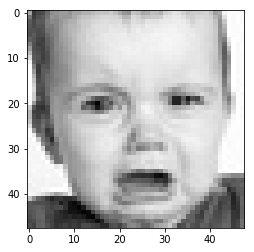

In [7]:
plt.imshow(img5)

In [8]:
pred=model.predict_classes(new_array)

In [8]:
pred=model.predict_classes(new_array)

pred[0]

cat[pred[0]]

'Fear'

In [10]:
pred[0]

2

In [9]:
import os
from tqdm import tqdm
import cv2

In [11]:
datadir='C:/Users/Avinash/Downloads/facial/emoji'
path=os.path.join(datadir)
emoji=[]
i=0
for img in tqdm(os.listdir(path)):
    img_array=cv2.imread(os.path.join(path,img),1)
    img5=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    img6=np.array(img5)
    new_array = cv2.resize(img6, (48, 48)) 
    #print(new_array.shape)
    emoji.append(new_array)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.01it/s]


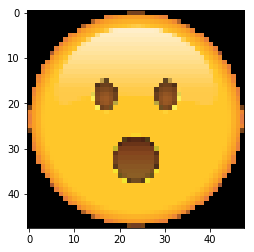

In [12]:
plt.imshow(emoji[6])
plt.show()

In [13]:
face_cascade=cv2.CascadeClassifier('C:/Users/Avinash/Downloads/frontalFace10/haarcascade_frontalface_default.xml')

In [14]:
font=cv2.FONT_HERSHEY_SIMPLEX

In [16]:
cap=cv2.VideoCapture(0)
roi_gray=[]
pr=0
while 1:
    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    center=0
    for(x,y,w,h) in faces:
        if(w>h):
            big=w
        else:
            big=h
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        
    k=cv2.waitKey(1) & 0xff
    
    
    temp=cv2.resize(cv2.UMat(roi_gray),(48,48))
    cv2.imwrite("Tempimg.jpg",roi_color)
    cv2.imwrite("face.jpg",temp)
    temp=cv2.imread("face.jpg")
    temp=temp/255
    pr=model.predict_classes(temp.reshape(1,48,48,3))
    my=pr
    my2=cat[my[0]]
    cv2.putText(img,my2,(20,20),font,1,(255,255,255),2)
    for (x,y,w,h) in faces:
        emoji1=cv2.resize(emoji[my[0]],(w,h))
        img[0:0+h,400:400+w]=emoji1
    cv2.imshow('img',img)
    #print(img.shape)
    
    if k==ord('0'):
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
#cap=cv2.VideoCapture(0)
#roi_gray=[]
#emoji=[]
#pop=0
#pr=0
#while 1:
    #ret,img=cap.read()
    #gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #faces=face_cascade.detectMultiScale(gray,1.3,5)
    #center=0
    #for(x,y,w,h) in faces:
        #if(w>h):
            #big=w
        #else:
            #big=h
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        #roi_gray=gray[y:y+h,x:x+w]
        #roi_color=img[y:y+h,x:x+w]
        #if (pop==1):
            #emoji=cv2.imread("Tempimg.jpg")
            #emoji=cv2.resize(emoji,(w,h))
            #print(emoji) 
            #img[y:y+h,x:x+w]=emoji
            #print(cat[my[0]])
            #print(img[y:y+h,x:x+w])
    #k=cv2.waitKey(30) & 0xff
    #if(k==ord('1')):
        #temp=cv2.resize(roi_gray,(48,48))
        #cv2.imwrite("Tempimg.jpg",roi_color)
        #cv2.imwrite("face.jpg",temp)
        #temp=cv2.imread("face.jpg")
        #temp=temp/255
        #pr=model.predict_classes(temp.reshape(1,48,48,3))
        #my=pr
        #print(pr)
        #print(cat[my[0]])
        #pop=1
    #img=imutils.resize(img,width=1280)
    #cv2.putText(img,'Hello world!',(10,10),font,5,(255,255,255),2)
    #cv2.imshow('img',img)
    
    
    #if k==ord('0'):
        #break
#cap.release()
#cv2.destroyAllWindows()

In [27]:
cap=cv2.VideoCapture(0)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    print(frame.dtype)
    my=ret
    my_img=frame
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    # When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
